In [1]:
import pandas as pd
from finta import TA
import numpy as np
from pathlib import Path

In [2]:
#yahoo finance stock data (for longer timeframe)
import yfinance as yf

def stock_df(ticker, start, end):
    stock = yf.Ticker(ticker)
    stock_df = stock.history(start = start, end = end)
    return stock_df

start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('today')
                     
spy_df = stock_df('SPY', start, end)

len(spy_df)

1770

In [3]:
# spy_df["Monetary Gain"] = spy_df["Close"].diff()
spy_df['Actual Return'] = spy_df["Close"].pct_change()

spy_df.loc[(spy_df['Actual Return']*100 > 1), 'Return Direction'] = 1
spy_df.loc[(spy_df['Actual Return']*100  < 1), 'Return Direction'] = 0
spy_df.loc[(spy_df['Actual Return']*100 < 0), "Return Direction"] = -1

# spy_df['Trades'] = np.abs(spy_df['Trading Signal'].diff())

# spy_df['Strategy Returns'] = spy_df['Actual Return'] * spy_df['Trading Signal'].shift()

spy_df.dropna(inplace= True)

spy_df.tail(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual Return,Return Direction
Date,,,,,,,,,
2021-12-14,461.468749,464.109466,458.638695,461.737793,97264100,0.000,0,-0.006880,-1.0
2021-12-15,461.797598,469.211523,459.126957,468.952454,116899300,0.000,0,0.015625,1.0
2021-12-16,470.915555,471.214493,463.172738,464.816986,116568600,0.000,0,-0.008819,-1.0
2021-12-17,461.549988,464.739990,458.059998,459.869995,135511600,1.633,0,-0.010643,-1.0
2021-12-20,454.480011,455.399994,451.140015,454.980011,107134800,0.000,0,-0.010633,-1.0
2021-12-21,458.609985,463.209991,456.309998,463.059998,69806300,0.000,0,0.017759,1.0
2021-12-22,462.790009,467.809998,462.579987,467.690002,58890200,0.000,0,0.009999,0.0
2021-12-23,468.750000,472.190002,468.640015,470.600006,56439700,0.000,0,0.006222,0.0
2021-12-27,472.059998,477.309998,472.010010,477.260010,56808600,0.000,0,0.014152,1.0


In [4]:
#per trade commision cost: 2% of total 
#ex.) if you bought 100 shares at 1/10/22 for a total of $46,270, there is $925.4 commision.
#Then you sell again at 1/11/21 for $46,523 , you make a profit of $253. But considering commision, you lose a lot more money

In [5]:
spy_technical_indicators = pd.DataFrame()

#Creating RSI evaluation metrics    
spy_technical_indicators["RSI"] = TA.RSI(spy_df, 14)
spy_technical_indicators["RSI Evaluation"] = "No Abnormalities"
spy_technical_indicators.loc[spy_technical_indicators["RSI"] > 70, 'RSI Evaluation'] = "Overvalued"
spy_technical_indicators.loc[spy_technical_indicators["RSI"] < 30, 'RSI Evaluation'] = "Undervalued"

spy_technical_indicators["RSI Lag"] = spy_technical_indicators["RSI Evaluation"].shift(1)


for index, row in spy_technical_indicators.iterrows():
    if (spy_technical_indicators.loc[index, "RSI Evaluation"] == "No Abnormalities" and spy_technical_indicators.loc[index, "RSI Lag"] == "Undervalued"):
            spy_technical_indicators.loc[index, "RSI Evaluation"] = "RSI Bullish Signal"
    if (spy_technical_indicators.loc[index, "RSI Evaluation"] == "No Abnormalities" and spy_technical_indicators.loc[index, "RSI Lag"] == "Overvalued"):
            spy_technical_indicators.loc[index, "RSI Evaluation"] = "RSI Bearish Signal"


spy_technical_indicators.drop(columns = ["RSI Lag"], inplace = True)
         
#Creating CCI evaluation metrics    
spy_technical_indicators["CCI"] = TA.CCI(spy_df, 14)
spy_technical_indicators["CCI Lag"] = spy_technical_indicators["CCI"].shift(1)

for index, row in spy_technical_indicators.iterrows():
    if (spy_technical_indicators.loc[index, "CCI"] > spy_technical_indicators.loc[index, "CCI Lag"]):
        if (spy_technical_indicators.loc[index, "CCI"] > 0 and spy_technical_indicators.loc[index, "CCI Lag"] < 0):
            spy_technical_indicators.loc[index, "CCI Evaluation"] = "CCI Uptrend"
        else:
            spy_technical_indicators.loc[index, "CCI Evaluation"] = "CCI Potential Uptrend"
            
    if (spy_technical_indicators.loc[index, "CCI"] < spy_technical_indicators.loc[index, "CCI Lag"]):
        if (spy_technical_indicators.loc[index, "CCI"] < 0 and spy_technical_indicators.loc[index, "CCI Lag"] > 0):
            spy_technical_indicators.loc[index, "CCI Evaluation"] = "CCI Downtrend"
        else:
            spy_technical_indicators.loc[index, "CCI Evaluation"] = "CCI Potential Downtrend"

spy_technical_indicators.drop(columns = ["CCI Lag"], inplace = True)

#Creating Rate of Change evaluation metrics
spy_technical_indicators["ROC"] = TA.ROC(spy_df, 20)
spy_technical_indicators["ROC Lag"] = spy_technical_indicators["ROC"].shift(1)

for index, row in spy_technical_indicators.iterrows():
    if (spy_technical_indicators.loc[index, "ROC"] > 0 and spy_technical_indicators.loc[index, "ROC Lag"] < 0):
            spy_technical_indicators.loc[index, "ROC Evaluation"] = "ROC Rising Momentum"
    if (spy_technical_indicators.loc[index, "ROC"] < 0 and spy_technical_indicators.loc[index, "ROC Lag"] > 0):
            spy_technical_indicators.loc[index, "ROC Evaluation"] = "ROC Falling Momentum"
    else:
        spy_technical_indicators.loc[index, "ROC Evaluation"] = "ROC Uninterpretable"
            
spy_technical_indicators.drop(columns = ["ROC Lag"], inplace = True)

#Creating Stochasic Indicator evaluation metrics
spy_technical_indicators["STO"] = TA.STOCH(spy_df)
spy_technical_indicators["STO Lag"] = spy_technical_indicators["STO"].shift(1)

for index, row in spy_technical_indicators.iterrows():
    if (spy_technical_indicators.loc[index, "STO"] > spy_technical_indicators.loc[index, "STO Lag"]):
        if (spy_technical_indicators.loc[index, "STO"] > 80):
            spy_technical_indicators.loc[index, "STO Evaluation"] = "STO Overbought Reversal"
        else:
            spy_technical_indicators.loc[index, "STO Evaluation"] = "STO Rising"
    if (spy_technical_indicators.loc[index, "STO"] < spy_technical_indicators.loc[index, "STO Lag"]):
        if (spy_technical_indicators.loc[index, "STO"] < 20):
            spy_technical_indicators.loc[index, "STO Evaluation"] = "STO Oversold Reversal"
        else:
            spy_technical_indicators.loc[index, "STO Evaluation"] = "STO Falling"

spy_technical_indicators.drop(columns = ["STO Lag"], inplace = True)

spy_technical_indicators["Returns"] = spy_df["Actual Return"]
spy_technical_indicators.dropna(inplace = True)

spy_technical_indicators

,RSI,RSI Evaluation,CCI,CCI Evaluation,ROC,ROC Evaluation,STO,STO Evaluation,Returns
Date,,,,,,,,,
2015-02-03,56.060242,No Abnormalities,76.640013,CCI Uptrend,1.546673,ROC Uninterpretable,83.095018,STO Overbought Reversal,0.014461
2015-02-04,53.981685,No Abnormalities,73.792484,CCI Potential Downtrend,2.121896,ROC Uninterpretable,73.809416,STO Falling,-0.003808
2015-02-05,58.371647,No Abnormalities,110.906719,CCI Potential Uptrend,1.883262,ROC Uninterpretable,97.867209,STO Overbought Reversal,0.010095
2015-02-06,56.758205,No Abnormalities,99.722381,CCI Potential Downtrend,-0.169965,ROC Falling Momentum,81.982930,STO Falling,-0.002765
2015-02-09,54.156152,No Abnormalities,50.891115,CCI Potential Downtrend,0.186017,ROC Uninterpretable,72.174289,STO Falling,-0.004476
...,...,...,...,...,...,...,...,...,...
2022-01-05,50.135922,No Abnormalities,11.190858,CCI Potential Downtrend,0.372752,ROC Uninterpretable,59.778060,STO Falling,-0.019202
2022-01-06,49.682393,No Abnormalities,-27.253761,CCI Downtrend,0.013632,ROC Uninterpretable,58.252392,STO Falling,-0.000939
2022-01-07,47.727484,No Abnormalities,-50.727289,CCI Potential Downtrend,0.295373,ROC Uninterpretable,51.837668,STO Falling,-0.003954


In [6]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

categorical_variables = list(spy_technical_indicators.dtypes[spy_technical_indicators.dtypes == "object"].index)

categorical_variables
enc = OneHotEncoder(sparse= False)
encoded_data = enc.fit_transform(spy_technical_indicators[categorical_variables])

encoded_df = pd.DataFrame(encoded_data, columns = enc.get_feature_names(categorical_variables), index = spy_technical_indicators.index)

encoded_df = pd.concat([encoded_df, spy_technical_indicators.drop(columns = categorical_variables)], axis = 1)
encoded_df

,RSI Evaluation_No Abnormalities,RSI Evaluation_Overvalued,RSI Evaluation_RSI Bearish Signal,RSI Evaluation_RSI Bullish Signal,RSI Evaluation_Undervalued,CCI Evaluation_CCI Downtrend,CCI Evaluation_CCI Potential Downtrend,CCI Evaluation_CCI Potential Uptrend,CCI Evaluation_CCI Uptrend,ROC Evaluation_ROC Falling Momentum,ROC Evaluation_ROC Uninterpretable,STO Evaluation_STO Falling,STO Evaluation_STO Overbought Reversal,STO Evaluation_STO Oversold Reversal,STO Evaluation_STO Rising,RSI,CCI,ROC,STO,Returns
Date,,,,,,,,,,,,,,,,,,,,
2015-02-03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,56.060242,76.640013,1.546673,83.095018,0.014461
2015-02-04,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,53.981685,73.792484,2.121896,73.809416,-0.003808
2015-02-05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,58.371647,110.906719,1.883262,97.867209,0.010095
2015-02-06,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,56.758205,99.722381,-0.169965,81.982930,-0.002765
2015-02-09,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,54.156152,50.891115,0.186017,72.174289,-0.004476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-05,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,50.135922,11.190858,0.372752,59.778060,-0.019202
2022-01-06,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,49.682393,-27.253761,0.013632,58.252392,-0.000939
2022-01-07,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,47.727484,-50.727289,0.295373,51.837668,-0.003954


In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = encoded_df.drop(columns = ["Returns"])
y = encoded_df["Returns"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
neural = Sequential()

number_input_features = len(X.columns)
hidden_nodes_layer1 =  (number_input_features + 1) // 2 
hidden_nodes_layer2 = (hidden_nodes_layer1 + 1) // 2
hidden_nodes_layer3 = (hidden_nodes_layer2 + 1) // 2

neural.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="elu"))
neural.add(Dense(units=hidden_nodes_layer2, activation="elu"))
neural.add(Dense(units=hidden_nodes_layer3, activation="elu"))
neural.add(Dense(units=1, activation="linear"))

neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                200       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________


In [9]:
# opt = tf.keras.optimizers.SGD(lr=0.01)
neural.compile(loss = "mse", optimizer = "adam",  metrics = ["mse"])

model = neural.fit(X_train_scaled, y_train, epochs = 500)

Epoch 1/500
41/41 [==============================] - 0s 748us/step - loss: 0.2957 - mse: 0.2957
Epoch 2/500
41/41 [==============================] - 0s 947us/step - loss: 0.0867 - mse: 0.0867
Epoch 3/500
41/41 [==============================] - 0s 748us/step - loss: 0.0411 - mse: 0.0411
Epoch 4/500
41/41 [==============================] - 0s 798us/step - loss: 0.0230 - mse: 0.0230
Epoch 5/500
41/41 [==============================] - 0s 798us/step - loss: 0.0141 - mse: 0.0141
Epoch 6/500
41/41 [==============================] - 0s 823us/step - loss: 0.0096 - mse: 0.0096
Epoch 7/500
41/41 [==============================] - 0s 748us/step - loss: 0.0071 - mse: 0.0071
Epoch 8/500
41/41 [==============================] - 0s 798us/step - loss: 0.0056 - mse: 0.0056
Epoch 9/500
41/41 [==============================] - 0s 773us/step - loss: 0.0046 - mse: 0.0046
Epoch 10/500
41/41 [==============================] - 0s 823us/step - loss: 0.0038 - mse: 0.0038
Epoch 11/500
41/41 [===================

In [11]:
# Y_prediction = (neural.predict(X_train_scaled) > 0.5).astype("int32")
Y_prediction = neural.predict(X_train_scaled)
Y_prediction = Y_prediction.squeeze()

results = pd.DataFrame( {"Predictions": Y_prediction, "Actual": y_train})
display(results)

model_loss, model_accuracy = neural.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Loss: {model_loss}, MSE: {model_accuracy}")

,Predictions,Actual
Date,,
2019-07-26,0.008167,0.006700
2020-10-21,-0.020881,-0.001893
2017-11-24,0.003984,0.002310
2015-07-13,0.010088,0.011037
2018-11-02,-0.009185,-0.005923
...,...,...
2017-12-06,-0.002891,0.000190
2018-09-11,0.005121,0.003297
2019-06-17,0.003794,0.000380


41/41 - 0s - loss: 2.6861e-05 - mse: 2.6861e-05 - 33ms/epoch - 803us/step
Loss: 2.6861469450523145e-05, Accuracy: 2.6861469450523145e-05


In [12]:
Y_test_prediction = (neural.predict(X_test_scaled) > 0.5).astype("int32")
Y_test_prediction = Y_test_prediction.squeeze()

test_results = pd.DataFrame( {"Predictions": Y_prediction, "Actual": y_train})

model_loss, model_accuracy = neural.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


14/14 - 0s - loss: 3.4585e-05 - mse: 3.4585e-05 - 19ms/epoch - 1ms/step
Loss: 3.458529317867942e-05, Accuracy: 3.458529317867942e-05


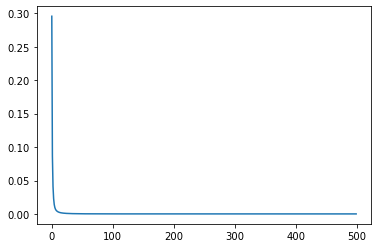

In [13]:
import matplotlib.pyplot as plt

plt.plot(model.history["loss"])

In [14]:
neural.save(Path("Files/Momentum_Indicators.h5"))

<AxesSubplot:xlabel='Date'>

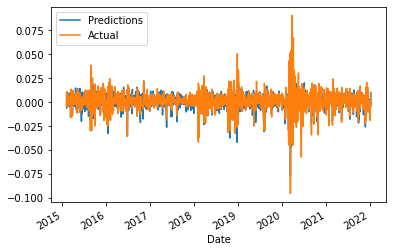

In [14]:
test_results.plot()